<a href="https://colab.research.google.com/github/MuhammadTaha25/Deep-Learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install tensorflow matplotlib numpy sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [13]:
from tensorflow.keras.datasets import mnist       # to load the MNIST dataset
from tensorflow.keras.models import Sequential   # to build a sequential neural network model
from tensorflow.keras.layers import Dense        # to add fully connected (Dense) layers
from tensorflow.keras.utils import to_categorical # to convert integer labels to one-hot encoded vectors


In [14]:
# Load the MNIST dataset:
# x_train, y_train → training images and their labels
# x_test,  y_test  → testing images and their labels
(x_train, y_train), (x_test, y_test) = mnist.load_data()


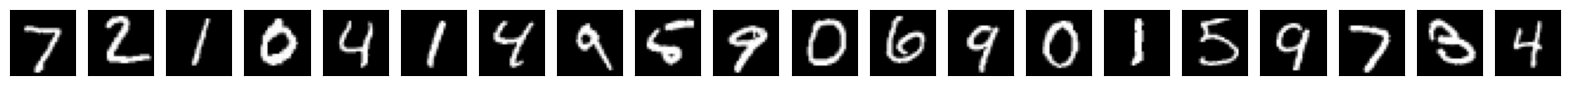

In [15]:
import matplotlib.pyplot as plt   # import matplotlib for plotting

n = 20  # number of images to display

# create a figure with width=20 inches and height=4 inches
plt.figure(figsize=(20, 4))

# create a grid of 2 rows × n columns for subplots
for i in range(n):
    ax = plt.subplot(2, n, i + 1)    # select the i-th subplot in the grid
    plt.imshow(x_test[i])            # display the i-th test image
    plt.gray()                       # apply a grayscale colormap
    ax.get_xaxis().set_visible(False)  # hide x-axis ticks
    ax.get_yaxis().set_visible(False)  # hide y-axis ticks

plt.show()   # render the plot
plt.close()  # close the plot window


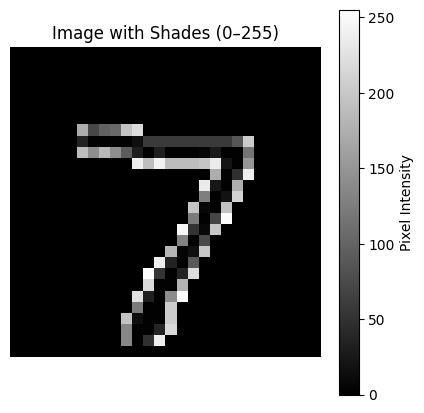

Pixel Shade Values (0–255):
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 172  71  97 105 196 220   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  34   2   

In [16]:
import matplotlib.pyplot as plt  # import matplotlib for plotting
import numpy as np               # import numpy for array operations

# Assume x_test[0] is normalized (0–1). Scale to 0–255 and convert to integer
image = (x_test[0] * 255).astype(int)  # now a 2D array of ints in [0,255]

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Image with Shades (0–255)")
plt.colorbar(label='Pixel Intensity')
plt.axis('off')
plt.show()

# Print out the pixel values
print("Pixel Shade Values (0–255):")
print(image)


In [17]:
# Flatten the images to vectors of length 784 (28×28)
x_test  = x_test.reshape(10000, 784)   # 10,000 test samples
x_train = x_train.reshape(60000, 784)  # 60,000 train samples

# Convert data type to float32 for precise division
x_test  = x_test.astype('float32')
x_train = x_train.astype('float32')

# Normalize pixel values to the [0–1] range
x_train /= 255
x_test  /= 255


In [18]:
from tensorflow.keras.utils import to_categorical  # for one-hot encoding

# Convert integer labels to one-hot vectors of length 10
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)


In [19]:
# Define hyperparameters
input_size     = 784    # number of input neurons (28×28)
epochs         = 15     # number of full passes over the training data
batch_size     = 250    # number of samples per gradient update
hidden_layer1  = 300    # neurons in the first hidden layer
hidden_layer2  = 40     # neurons in the second hidden layer
output         = 10     # number of output classes (digits 0–9)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a simple feed-forward neural network
model = Sequential()
model.add(Dense(hidden_layer1, input_dim=input_size, activation='relu'))
model.add(Dense(hidden_layer2, activation='relu'))
model.add(Dense(output, activation='softmax'))


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sequential model shuru karo
model = Sequential()

# Pehli hidden layer:
# neurons = hidden_layer1,
# input dimension = input_size (784),
# activation function = ReLU
model.add(Dense(hidden_layer1, input_dim=input_size, activation='relu'))

# Doosri hidden layer:
# neurons = hidden_layer2,
# activation function = ReLU
model.add(Dense(hidden_layer2, activation='relu'))

# Output layer:
# neurons = output (10 classes),
# activation function = softmax (probabilities)
model.add(Dense(output, activation='softmax'))


In [22]:
# compiling the model
# getting model summary
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 40)             │        12,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,950 (968.55 KB)

 Trainable params: 247,950 (968.55 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from time import time  # to measure training duration

tic = time()

# training the model
model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size
)
toc = time()

print("Time taken for model training:", toc - tic, "seconds")


Epoch 1/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3725 - loss: 1.9758
Epoch 2/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8040 - loss: 0.8594
Epoch 3/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8618 - loss: 0.5624
Epoch 4/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8803 - loss: 0.4566
Epoch 5/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8916 - loss: 0.4037
Epoch 6/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8991 - loss: 0.3631
Epoch 7/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9049 - loss: 0.3435
Epoch 8/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9087 - loss: 0.3262
Epoch 9/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9124 - loss: 0.3135
Epoch 10/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9169 - loss: 0.2947
Epoch 11/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9182 - loss: 0.2889
Epoch 12/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/

yeh wala

In [24]:
# Predict class‐probabilities on the test set
y_pred_probs = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [25]:
from sklearn.metrics import accuracy_score  # accuracy_score function import kar ke accuracy nikalne ke liye
import numpy as np                         # NumPy import karo array operations ke liye

# x_test pe model se har class ki probability predict karo
y_pred_probs = model.predict(x_test)

# 0.5 threshold use karke probabilities ko 0/1 binary values me convert karo
# agar probability > 0.5 hogi to 1, warna 0
y_pred_binary = np.where(y_pred_probs > 0.5, 1, 0)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
import numpy as np
from sklearn.metrics import accuracy_score

# Convert probabilities to binary (0/1) using a 0.5 threshold
y_pred_binary = np.where(y_pred_probs > 0.5, 1, 0)

# From the binary matrix, extract predicted class labels
y_pred_labels = np.argmax(y_pred_binary, axis=1)

# Convert true one-hot labels back to integer class labels
y_true_labels = np.argmax(y_test, axis=1)

# Compute and print test accuracy
acc = accuracy_score(y_true_labels, y_pred_labels)
print("Test accuracy:", acc)


Test accuracy: 0.9164


In [27]:
# Select test samples from index 20 to 39
x = x_test[20:40]

# Predict class probabilities for these samples
y_pred_proba = model.predict(x)

# Convert probabilities to binary (0/1) predictions with a 0.5 threshold
y_predicts = np.where(y_pred_proba > 0.5, 1, 0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


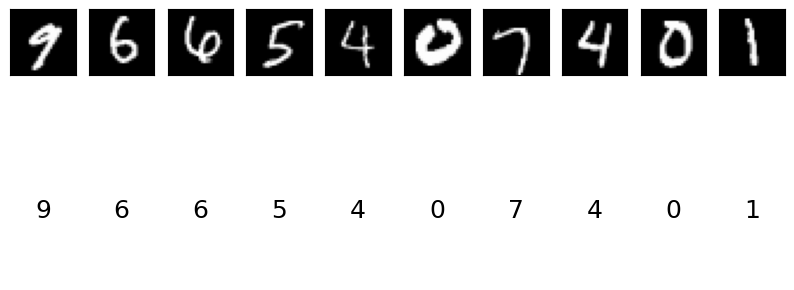

In [28]:
import matplotlib.pyplot as plt  # import matplotlib for plotting

n = 10  # number of examples to display

# Create a figure of size 10"x4"
plt.figure(figsize=(10, 4))

# Loop over the first n examples
for i in range(n):
    # Top row: display the i-th image (reshaped back to 28×28)
    ax_img = plt.subplot(2, n, i + 1)
    plt.imshow(x[i].reshape(28, 28))  # show image
    plt.gray()                       # use grayscale colormap
    ax_img.get_xaxis().set_visible(False)  # hide x-axis ticks
    ax_img.get_yaxis().set_visible(False)  # hide y-axis ticks

    # Compute the predicted class by taking argmax of the binary predictions
    y_pred_argmax = np.argmax(y_predicts[i])

    # Bottom row: display the predicted label as text
    ax_txt = plt.subplot(2, n, i + 1 + n)
    plt.text(
        0.5, 0.5,                       # position text in the center
        y_pred_argmax,                  # predicted digit
        fontsize=18,                    # font size
        ha='center',                    # horizontal alignment
        va='center'                     # vertical alignment
    )
    plt.axis('off')  # hide axes around the text

# Render the full figure
plt.show()
plt.close()
